In [17]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import modules.simulation as simulation
import pyccl as ccl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
simulator = simulation.UniverseSimulator( default_config_path = '../../config/capish.ini', 
                                         variable_params_names = ['Omega_m', 'sigma_8'])

In [19]:
new_config = simulator.new_config_files([0.25, 0.8])

In [20]:
log10m_true, z_true = simulator.halo_catalogue_class.get_halo_catalogue(new_config)
richness, log10mWL, z_obs = simulator.cluster_catalogue_class.get_cluster_catalogue(log10m_true, z_true, new_config)

In [21]:
count, mean_mass = simulator.summary_statistics_class.get_summary_statistics(richness, log10mWL, z_obs, new_config)

In [23]:
new_config['summary_statistics']['summary_statistic'] = '3d_count'

In [24]:
new_config['summary_statistics']['summary_statistic']

'3d_count'

In [25]:
threed_count = simulator.summary_statistics_class.get_summary_statistics(richness, log10mWL, z_obs, new_config)

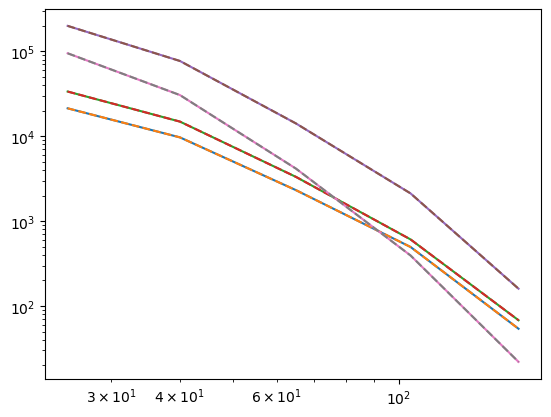

In [26]:
for i in range(len(simulator.summary_statistics_class.redshift_edges) - 1):
    plt.plot(simulator.summary_statistics_class.richness_centers, count[:,i])
    plt.plot(simulator.summary_statistics_class.richness_centers, np.sum(threed_count, axis=2)[:,i], '--')
plt.xscale('log')
plt.yscale('log')

In [27]:
simulator = simulation.UniverseSimulator( default_config_path = '../../config/capish.ini', 
                                         variable_params_names = ['Omega_m', 'sigma_8'])

In [28]:
summary_statistics1 = simulator.run_simulation([0.25, 0.8])

In [29]:
np.random.seed(2)
summary_statistics2 = simulator.run_simulation([0.25, 0.8])

In [30]:
import pickle
def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [31]:
sims = load('simulations_with_multiprocessing.pkl')
counts = np.array(sims)[:,0]

In [32]:
count_mean = np.mean(counts[:], axis=0)

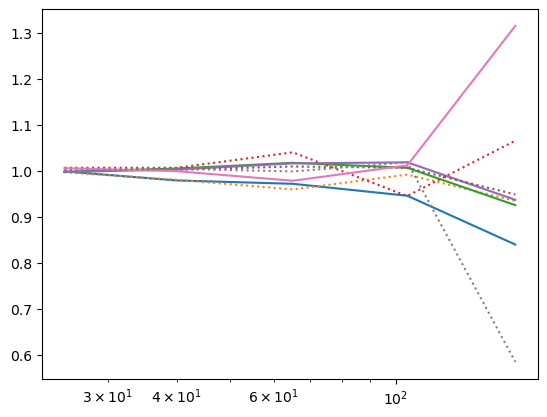

In [33]:
for i in range(len(simulator.summary_statistics_class.redshift_edges) - 1):
    plt.plot(simulator.summary_statistics_class.richness_centers, summary_statistics1[0][:,i]/count_mean[:,i])
    plt.plot(simulator.summary_statistics_class.richness_centers, summary_statistics2[0][:,i]/count_mean[:,i], ':')

   # plt.plot(simulator.summary_statistics_class.richness_centers, np.sum(threed_count, axis=2)[:,i], '--')
plt.xscale('log')
#plt.yscale('log')